## 5.2 Training a convnet from scratch on a small dataset
As a practical example, we will focus on classifying images as dogs or cats, in a dataset containing 4,000 pictures of cats and dogs (2000 of each). We'll use 2,000 pictures for training - 1,000 for validation, and 1,000 for testing.

We will start by naively training a small convnet on the 2,000 training samples, without any regularization, to set a baseline.

### 5.2.1 The relevance of deep learning for small-data problems
One fundamental characteristic of deep learning is that it can find interesting features in the training data on its own, without any need for manual feature engineering, and this can only be achieved when lots of training examples are available.

But what constitutes lots of samples is relative to the size and depth of the network you're trying to train. Because convnets learn local, translation-invariant features, they're highly data efficient on perceptual problems. 

In addition, deep learning models are highly repurposable. You can take an image-classification or speech-to-text model trained on a large-scale dataset and reuse it on a significantly different problem with only minor changes.

### 5.2.2 Downloading the data
We will work with a datasets containing 25,000 images of dogs and cats (12,500 from each class). After downloading and uncompressing it, we'll create a new dataset containing three subsets: a training set with 1,000 samples of each class, a validation set with 500 samples of each class, and a test set with 500 samples of each class.

Here are some examples of the photos from the dataset:
![catsdogs](images/5_2_2_catsdogs.jpg)

**DEFINING DATASET PATH**

In [1]:
import os, shutil

# path to directory where original dataset was uncompressed
#original_dataset_dir = '/Volumes/RobStorage/Desktop/Python_Practice/DL_with_Python/data/catsdogs'
#original_dataset_dir = '/DL_with_Python/data/catsdogs/dogscats/'
original_dataset_dir = 'data/train/'

# Directory where we will store smaller dataset
# base_dir = '/Volumes/RobStorage/Desktop/Python_Practice/DL_with_Python/data/cats_and_dogs_small'
base_dir = 'data/cats_and_dogs_small'

# Create the new directory (folder)
#os.mkdir(base_dir)

**CREATING SUBDIRECTORIES FOR TRAINING, VALIDATION, & TESTING**

In [2]:
# Directory for training
train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)

# Directory for validation
validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)

# Directory for testing
test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

In [3]:
# directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
#os.mkdir(train_cats_dir)

# directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
#os.mkdir(train_dogs_dir)

In [4]:
# directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
#os.mkdir(validation_cats_dir)

# directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
#os.mkdir(validation_dogs_dir)

In [5]:
# directory with test cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
#os.mkdir(test_cats_dir)

# directory with test dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
#os.mkdir(test_dogs_dir)

**COPYING IMAGES INTO PROPER DIRECTORIES**

In [6]:
#train_image_path = '/Volumes/RobStorage/Desktop/Python_Practice/DL_with_Python/data/catsdogs/train'
train_image_path = 'data/train'


In [7]:
# Copy the first 1,000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(train_image_path, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [8]:
# Copy the next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(train_image_path, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [9]:
# Copy the next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(train_image_path, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
# Copy the first 1,000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(train_image_path, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [11]:
# Copy the next 500 dog images to validation_dog_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(train_image_path, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [12]:
# Copy the next 500 dog images to test_dog_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(train_image_path, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

**VERIFY NUMBER OF PICTURES IN EACH DIRECTORY**

In [13]:
print "total training cat images:", len(os.listdir(train_cats_dir))
print "total training dog images:", len(os.listdir(train_dogs_dir))
print "total validation cat images:", len(os.listdir(validation_cats_dir))
print "total validation dog images:", len(os.listdir(validation_dogs_dir))
print "total test cat images:", len(os.listdir(test_cats_dir))
print "total test dog images:", len(os.listdir(test_dogs_dir))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


Perfect! We have 2,000 training samples, 1,000 validation samples, and 1,000 test images. This is a balanced binary-classification problem, which means classification accuracy will be an appropriate measure of success.

### 5.2.3 Building the network

In [14]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [15]:
# Let's get an overview of our model architecture
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [16]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=.0001),
              metrics=['acc'])

### 5.2.4 Data preprocessing
Now that we have structured our project directories and built our network, we will now make sure our data is formatted into appropriate preprocessed floating-point tensors before we feed it into the network. Currently, the data sits as JPEG files, so the steps for getting it into the network are as follows:
 1. Read the picture files.
 2. Decode the JPEG content to RGB grids of pixels.
 3. Convert these into floating-point tensors.
 4. Rescale the pixel values (between 0 and 255) to the [0,1] interval.
 
Fortunately Keras has utilities to take care of these steps automatically with a module that provides image-processing helper tools.

In [17]:
from keras.preprocessing.image import ImageDataGenerator

# Rescale all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# train_dir is target directory
# target size resizes images to 150x150
# binary because we use binary_crossentropy loss
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150),
                                                    batch_size=20, class_mode='binary')


validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150,150),
                                                    batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


**UNDERSTANDING PYTHON GENERATORS**
A Python generator is an object that acts as an iterator: it's an object you can use with the `for ... in` operator. Generators are built using the `yield` operator.

Here is an example of a generator that yields integers:

In [18]:
def generator():
    i = 0
    while True:
        i += 1
        yield i
        
for item in generator():
    print item
    if item > 4:
        break

1
2
3
4
5


Let's look at the output of one of these generators: it yields batches of 150x150 RGB images (shape (`20, 150, 150, 3`)) and binary labels (shape(20,)). There are 20 samples in each batch (the batch size). The generator yields these batches indefinitely: it loops endlessly over the images in the target folder. For this reason, we need to break the iteration loop at some point:

In [19]:
for data_batch, labels_batch in train_generator:
    print "data batch shape:", data_batch.shape
    print "labels batch shape:", labels_batch.shape
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


Let's fit the model to the data using the generator. You do so using the `fit_generator` method, the equivalent of `fit` for data generators like this one. It expects its first argument to be a Python generator that will yield batches of inputs and targets indefinitely. Because the data is generated endlessly, the Keras model needs to know how many samples to draw from the generator before declaring an epoch over. This is the role of the `steps_per_epoch` argument: after having run for `steps_per_epoch` gradient descent steps, the fitting process wil to go the next epoch. In this case, batches are 20 samples, so it will take 100 batches until we see our target of 2,000 samples.

In [20]:
history = model.fit_generator(train_generator, steps_per_epoch=100,
                              epochs=30, validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 127s 1s/step - loss: 0.6895 - acc: 0.5345 - val_loss: 0.6747 - val_acc: 0.5370
Epoch 2/30
100/100 [==============================] - 126s 1s/step - loss: 0.6623 - acc: 0.6040 - val_loss: 0.6783 - val_acc: 0.5490
Epoch 3/30
100/100 [==============================] - 126s 1s/step - loss: 0.6177 - acc: 0.6630 - val_loss: 0.6202 - val_acc: 0.6510
Epoch 4/30
100/100 [==============================] - 127s 1s/step - loss: 0.5720 - acc: 0.6950 - val_loss: 0.6011 - val_acc: 0.6580
Epoch 5/30
100/100 [==============================] - 126s 1s/step - loss: 0.5292 - acc: 0.7295 - val_loss: 0.5803 - val_acc: 0.6870
Epoch 6/30
100/100 [==============================] - 126s 1s/step - loss: 0.4948 - acc: 0.7475 - val_loss: 0.5667 - val_acc: 0.6940
Epoch 7/30
100/100 [==============================] - 126s 1s/step - loss: 0.4833 - acc: 0.7735 - val_loss: 0.5555 - val_acc: 0.7140
Epoch 8/30
100/100 [==============================] - 127s 1s/step - 

In [21]:
model.save('cats_and_dogs_small_1.h5')

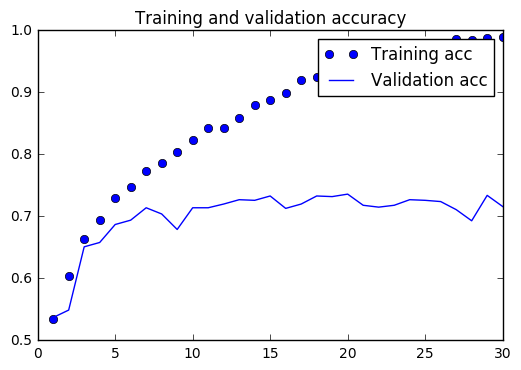

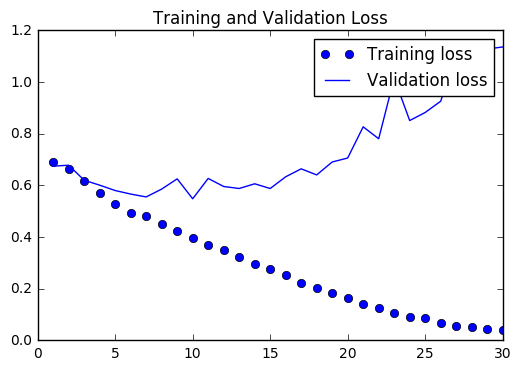

In [22]:
# plot loss and accuracy of model over training and valid data during training
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In the *Training and Validation Accuracy Graph* (top), we see the validation accuracy begin to plateau at around 8 epochs. It the lower graph, we see that the validation loss also reaches a minimum around the 8th epoch. Both graphs are telltale signs of overfitting. We can apply some techniques to combat overfitting, such as dropout and L2 regularization, but we will attempt a technique called **data augmentation** that is specific to computer vision.

### 5.2.5 Using data augmentation
Overfitting is caused by having too few samples to learn from, which prevents you from training a model that can generalize on new data. Data augmentation takes the approach of generating more training data from existing training samples, by *augmenting* the samples with a number of random transformation that produce believable-looking images.

In Keras, this can be done by configuring a number of random transformations to be performed on the images read by the `ImageDataGenerator` instance. Here is an example:

In [23]:
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2,
                             height_shift_range=0.2, shear_range=0.2,
                             zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

Let's go over the code:
 - **`rotation_range`** is a value in degrees (0-180) that the original image will be rotated.
 - **`width_shift`** and **`height_shift`** are ranges to translate the pictures vertically or horizontally.
 - **`shear_range`** is for randomly applying shearing transformations.
 - **`zoom_range`** is for randomly zooming inside pictures.
 - **`horizontal_flip`** is for randomly flipping half the images horizontally.
 - **`fill_mode`** is a strategy used for filling in newly created pixels.
 
Let's take a look at augmented images:

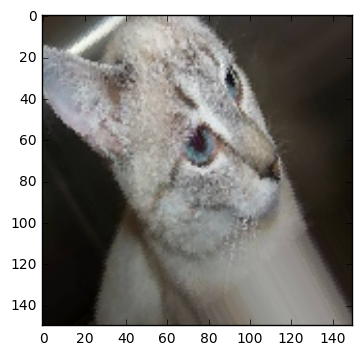

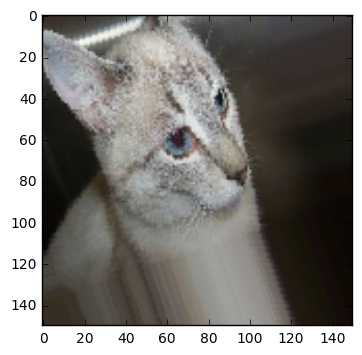

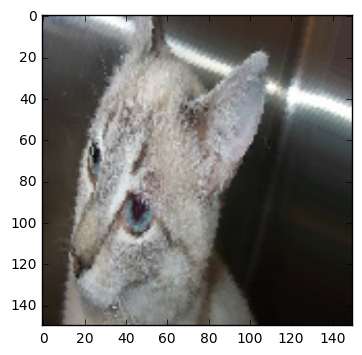

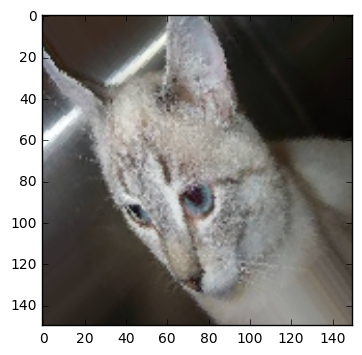

In [24]:
# Module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for
          fname in os.listdir(train_cats_dir)]

# chooses one image to augment
img_path = fnames[3]

# read image & resize
img = image.load_img(img_path, target_size=(150, 150))

# convert image to Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# generate batches of randomly transformed images
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

If we train a new network using this data-augmentation configuration, the network will never see the same input twice. Because transforming images share many similarities with our limited amount of original images, this may not be enough to completely prevent overfitting. To further fight overfitting, we will also add a `Dropout` layer.

In [25]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # NEW
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=.0001),
              metrics=['acc'])

In [26]:
# train network using data augmentation and dropout
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

# validation data should not be augmented
test_datagen = ImageDataGenerator(rescale=1./255)

In [27]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150),
                                                    batch_size=32, class_mode='binary')


validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150,150),
                                                        batch_size=32, class_mode='binary')


history = model.fit_generator(train_generator, steps_per_epoch=100,
                              epochs=100, validation_data=validation_generator,
                              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 207s 2s/step - loss: 0.6910 - acc: 0.5184 - val_loss: 0.6809 - val_acc: 0.5692
Epoch 2/100
100/100 [==============================] - 203s 2s/step - loss: 0.6770 - acc: 0.5638 - val_loss: 0.7004 - val_acc: 0.5445
Epoch 3/100
100/100 [==============================] - 202s 2s/step - loss: 0.6712 - acc: 0.5756 - val_loss: 0.6729 - val_acc: 0.5444
Epoch 4/100
100/100 [==============================] - 203s 2s/step - loss: 0.6482 - acc: 0.6216 - val_loss: 0.6499 - val_acc: 0.6018
Epoch 5/100
100/100 [==============================] - 202s 2s/step - loss: 0.6333 - acc: 0.6400 - val_loss: 0.6017 - val_acc: 0.6669
Epoch 6/100
100/100 [==============================] - 204s 2s/step - loss: 0.6116 - acc: 0.6606 - val_loss: 0.5816 - val_acc: 0.6823
Epoch 7/100
100/100 [==============================] - 203s 2s/step - loss: 0.6023 - acc: 0.6762 - val_loss: 0.5

Now let's plot the results of the model trained with data augmentation and dropout.

![data aug1](images/5_2_5_dataaug1.jpg)
![data aug2](images/5_2_5_dataaug2.jpg)

As you can see, we have now reached an **accuracy of 82%**, which is a 15% relative improvement over the non-generalized model. With a little bit more parameter tuning, we may be able to reach greater accuracy yet!